### Summarizing and Visualizing
#### Import Relevant Libraries

In [4]:
library(tidyverse)
library(gapminder)

##### Calculating the mean for lifeExp

In [6]:
gapminder %>% summarize(meanLifeExp = mean(lifeExp))

meanLifeExp
59.47444


##### Calculating the mean, median, max, and min for lifeExp in 2007 a

In [7]:
gapminder %>% filter(year == 2007) %>% summarize(meanLifeExp = mean(lifeExp))

meanLifeExp
67.00742


In [11]:
gapminder %>% filter(year == 2007) %>% summarize(meanLifeExp = mean(lifeExp), total_pop = sum(as.numeric(pop)))

meanLifeExp,total_pop
67.00742,6251013179


##### Grouping using "group_by" 

In [21]:
gapminder %>%   # "group_by" most be use before summarize()
    group_by(year) %>% 
        summarize(meanLifeExp = mean(lifeExp), 
                  total_pop = sum(as.numeric(pop)), 
                  min_gdp = min(gdpPercap), 
                  max_gdp = max(gdpPercap))

year,meanLifeExp,total_pop,min_gdp,max_gdp
1952,49.05762,2406957150,298.8462,108382.35
1957,51.50740,2664404580,335.9971,113523.13
1962,53.60925,2899782974,355.2032,95458.11
1967,55.67829,3217478384,349.0000,80894.88
1972,57.64739,3576977158,357.0000,109347.87
1977,59.57016,3930045807,371.0000,59265.48
1982,61.53320,4289436840,424.0000,33693.18
1987,63.21261,4691477418,385.0000,31540.97
1992,64.16034,5110710260,347.0000,34932.92
1997,65.01468,5515204472,312.1884,41283.16


In [26]:
col <- gapminder %>% filter(country == "Colombia")
col %>% summarize(min_lifeExp = min(lifeExp), max_lifeExp = max(lifeExp))

min_lifeExp,max_lifeExp
50.643,72.889


In [52]:
gapminder %>% 
    filter(year == 2007) %>%
        group_by(continent) %>% 
            summarize(meanLifeExp = mean(lifeExp), 
                      meanGdpPercap = mean(gdpPercap),
                      totalGdpPercap = sum(gdpPercap), 
                      totalPop = sum(as.numeric(pop)))

continent,meanLifeExp,meanGdpPercap,totalGdpPercap,totalPop
Africa,54.80604,3089.033,160629.70,929539692
Americas,73.60812,11003.032,275075.79,898871184
Asia,70.72848,12473.027,411609.89,3811953827
Europe,77.64860,25054.482,751634.45,586098529
Oceania,80.71950,29810.188,59620.38,24549947


In [53]:
continent <- gapminder %>% 
    filter(year == 2007) %>%
        group_by(continent) %>% 
            summarize(meanLifeExp = mean(lifeExp), 
                      meanGdpPercap = mean(gdpPercap),
                      totalGdpPercap = sum(gdpPercap), 
                      totalPop = sum(as.numeric(pop)))
continent

continent,meanLifeExp,meanGdpPercap,totalGdpPercap,totalPop
Africa,54.80604,3089.033,160629.70,929539692
Americas,73.60812,11003.032,275075.79,898871184
Asia,70.72848,12473.027,411609.89,3811953827
Europe,77.64860,25054.482,751634.45,586098529
Oceania,80.71950,29810.188,59620.38,24549947


In [54]:
continent %>% mutate(parTotalPop = totalPop/sum(cont[1:5,5]),
                parTotalGdp = totalGdpPercap/sum(cont[1:5,4]))

continent,meanLifeExp,meanGdpPercap,totalGdpPercap,totalPop,parTotalPop,parTotalGdp
Africa,54.80604,3089.033,160629.70,929539692,0.148702245,0.09684829
Americas,73.60812,11003.032,275075.79,898871184,0.143796079,0.16585116
Asia,70.72848,12473.027,411609.89,3811953827,0.609813756,0.24817152
Europe,77.64860,25054.482,751634.45,586098529,0.093760565,0.45318217
Oceania,80.71950,29810.188,59620.38,24549947,0.003927355,0.03594685


##### Keep grouping 

In [58]:
gapminder %>%         # group_by can select groups by more than one variable
    group_by(year,continent) %>% 
        summarize(meanLifeExp = mean(lifeExp), 
                  meanGdpPercap = mean(gdpPercap),
                  totalGdpPercap = sum(gdpPercap), 
                  totalPop = sum(as.numeric(pop)))

year,continent,meanLifeExp,meanGdpPercap,totalGdpPercap,totalPop
1952,Africa,39.13550,1252.572,65133.77,237640501
1952,Americas,53.27984,4079.063,101976.56,345152446
1952,Asia,46.31439,5195.484,171450.97,1395357351
1952,Europe,64.40850,5661.057,169831.72,418120846
1952,Oceania,69.25500,10298.086,20596.17,10686006
1957,Africa,41.26635,1385.236,72032.28,264837738
1957,Americas,55.96028,4616.044,115401.09,386953916
1957,Asia,49.31854,5787.733,190995.19,1562780599
1957,Europe,66.70307,6963.013,208890.38,437890351
1957,Oceania,70.29500,11598.522,23197.04,11941976


### Visualizing 
#### Scatter plots

In [63]:
by_year <- gapminder %>% # create a new DataFrame "by_year" which conteins the mean of lifeExp and total_pop for each year
    group_by(year) %>% # "group_by" most be use before summarize()
        summarize(meanLifeExp = mean(lifeExp), total_pop = sum(as.numeric(pop)))
by_year

year,meanLifeExp,total_pop
1952,49.05762,2406957150
1957,51.50740,2664404580
1962,53.60925,2899782974
1967,55.67829,3217478384
1972,57.64739,3576977158
1977,59.57016,3930045807
1982,61.53320,4289436840
1987,63.21261,4691477418
1992,64.16034,5110710260
1997,65.01468,5515204472


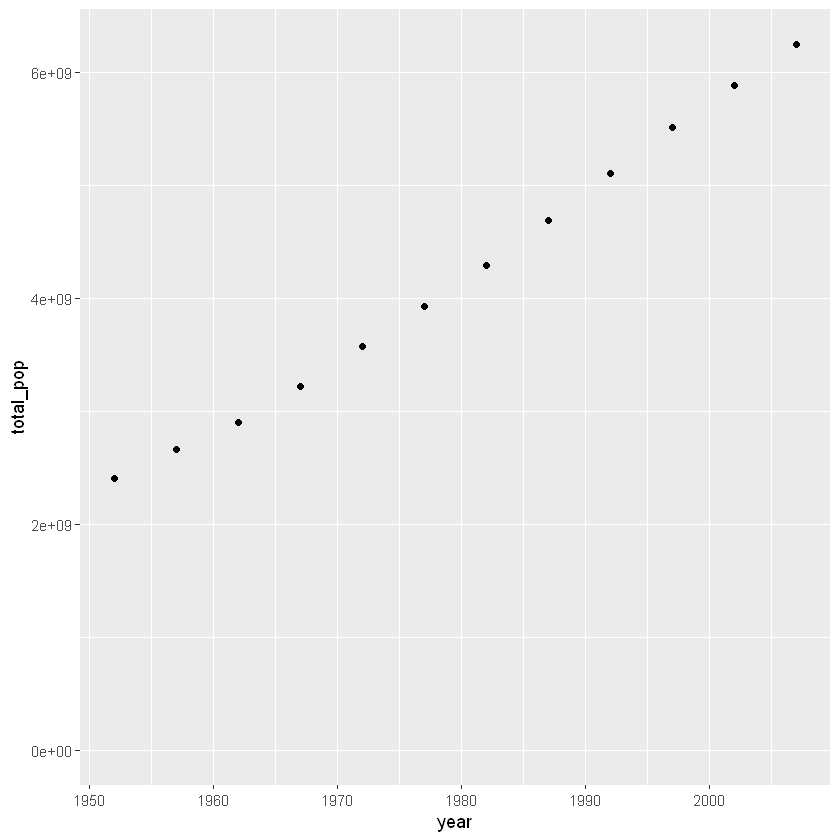

In [68]:
ggplot(by_year, aes(x=year,y=total_pop)) + geom_point() + # ploting the new DataFrame against the time
                                           expand_limits(y=0) # determining the limit for the 'y' axes

In [70]:
by_year_cont <- gapminder %>% # create a new DataFrame "by_year" which conteins the mean of lifeExp and total_pop for each year
    group_by(year,continent) %>% # "group_by" most be use before summarize()
        summarize(meanLifeExp = mean(lifeExp), total_pop = sum(as.numeric(pop)))
head(by_year_cont)

year,continent,meanLifeExp,total_pop
1952,Africa,39.13550,237640501
1952,Americas,53.27984,345152446
1952,Asia,46.31439,1395357351
1952,Europe,64.40850,418120846
1952,Oceania,69.25500,10686006
1957,Africa,41.26635,264837738


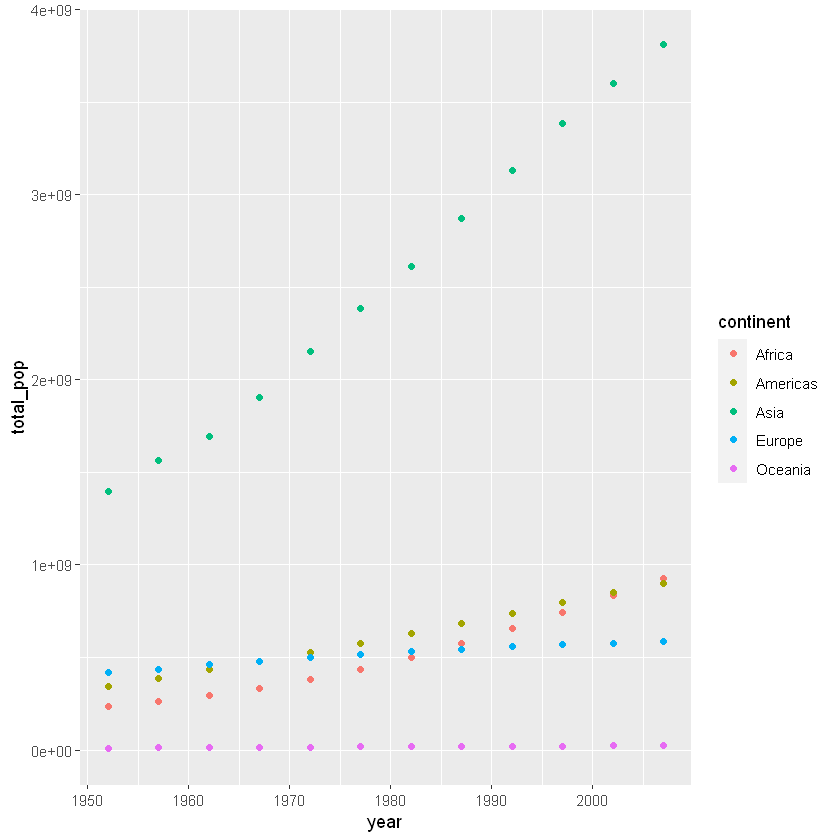

In [72]:
8ggplot(by_year_cont, aes(x=year,y=total_pop,color=continent)) + geom_point() + expand_limits(y=0)

#### Line plots

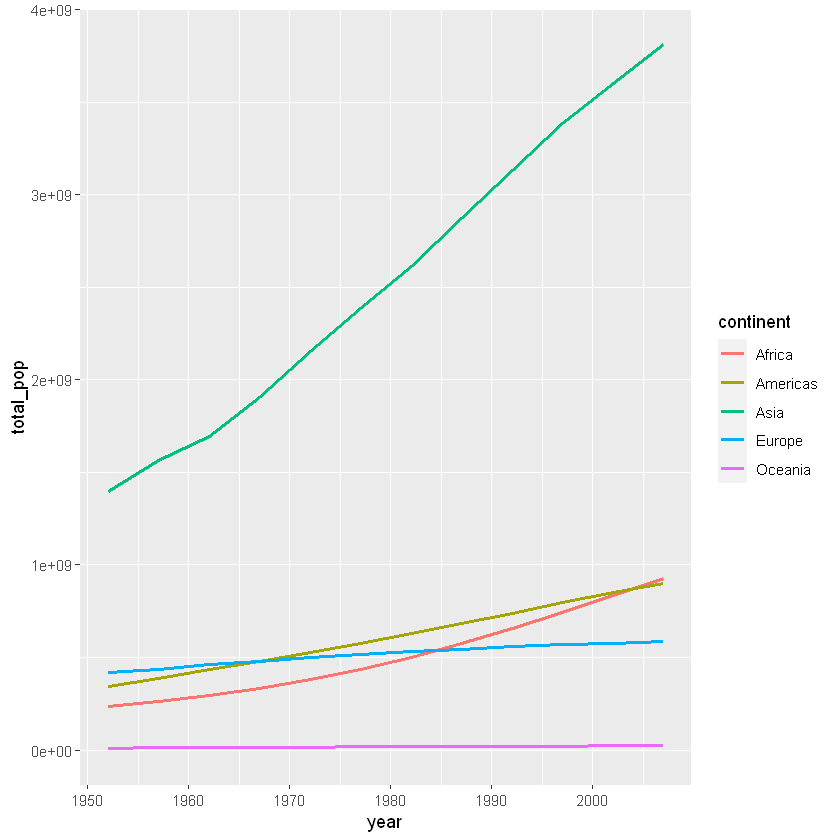

In [77]:
ggplot(by_year_cont, aes(x=year,y=total_pop,color=continent)) + 
        geom_line(lwd = 1) + # changing the "point()" for "line()"
        expand_limits(y=0) 

### Bar Plot

In [92]:
oceania_1952 <- gapminder %>% filter(year == 2007, continent == "Oceania")
oceania_1952

country,continent,year,lifeExp,pop,gdpPercap
Australia,Oceania,2007,81.235,20434176,34435.37
New Zealand,Oceania,2007,80.204,4115771,25185.01


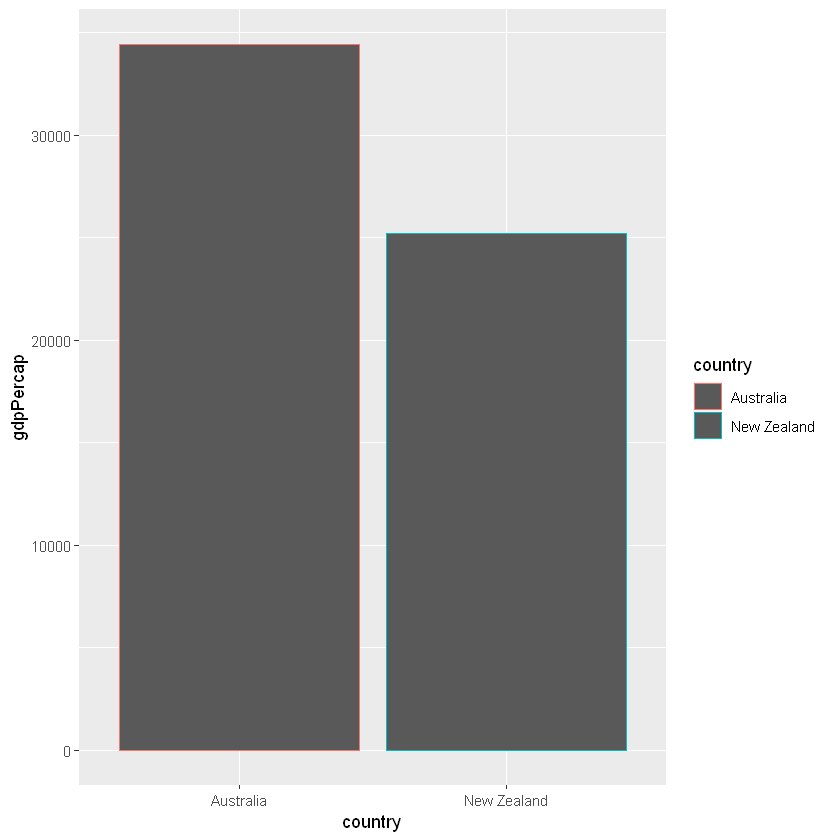

In [99]:
ggplot(oceania_1952, aes(x=country,y=gdpPercap,color=country)) + geom_col()

### Histogram Plot

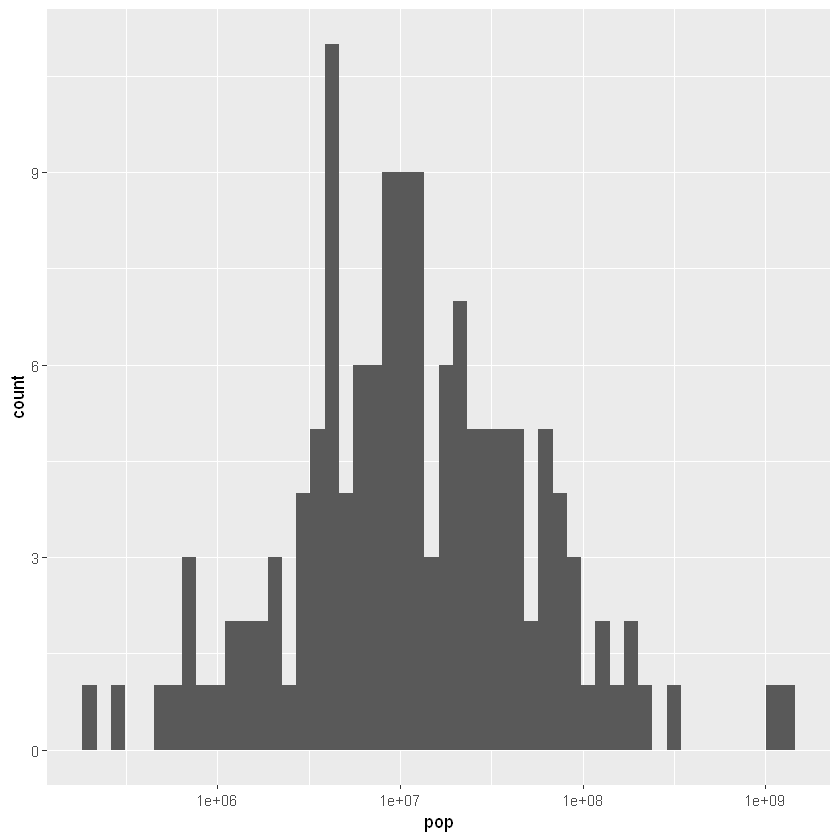

In [107]:
gap_2007 <- gapminder %>% filter(year == 2007)
ggplot(gap_2007, aes(x=pop)) + geom_histogram(bins=50) + scale_x_log10()

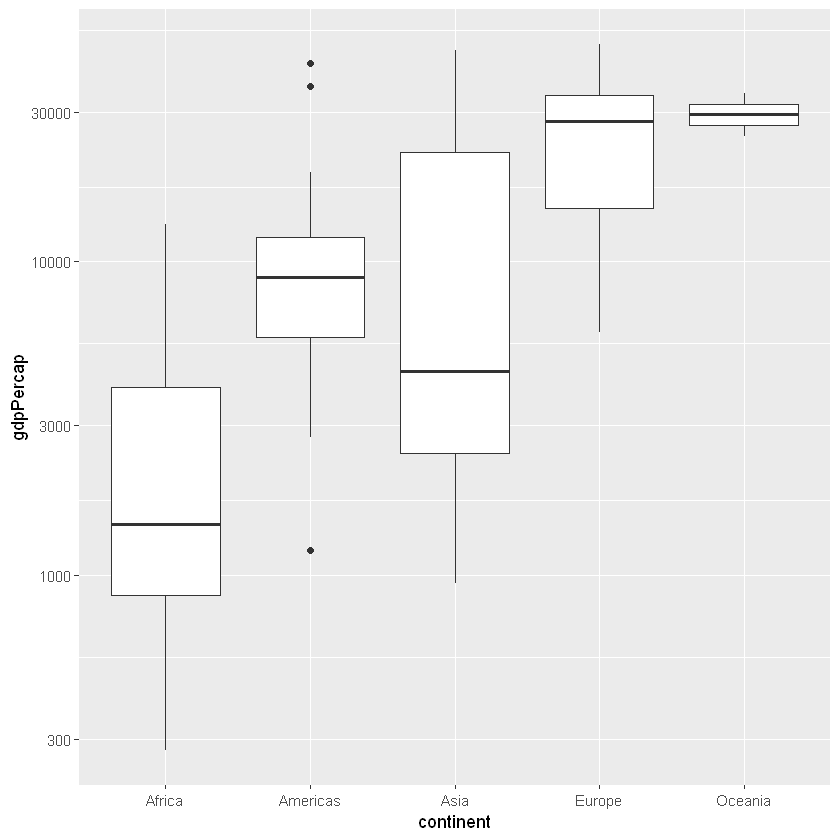

In [108]:
ggplot(gap_2007, aes(x=continent,y=gdpPercap)) + geom_boxplot() + scale_y_log10()